In [43]:
from utils.converters import df_to_XY
from utils.readers import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.descriptivestats as std
from statsmodels.tsa.stattools import adfuller as stf
from statsmodels.tsa.api import VAR
from statsmodels.tsa import *

## Read data
## Grouping M&A volume by month

In [3]:
def reconfigure_vol_df(df):
    df['Date'] = df['Date'].dt.to_period('M')
    out = {'date': [], 'vol': []}
    for y in range(2000, 2022):
        for m in range(1, 13):
            i = f"{y}-{m}"
            d = df[df['Date'] == i]
            out['date'].append(i)
            out['vol'].append(len(d))
    df = pd.DataFrame(data=out['vol'], index=out['date'], columns=['vol'])
    df.index.name = 'date'
    return df

In [4]:
"""Groups M&A transactions of UK being the acquirer by month"""
acquirer_uk = read_acquirer_uk()
acquirer_uk = reconfigure_vol_df(acquirer_uk)
acquirer_uk

,vol
date,
2000-1,101
2000-2,117
2000-3,158
2000-4,139
2000-5,113
...,...
2021-8,60
2021-9,57
2021-10,60


In [5]:
"""Groups M&A transactions of UK being the target by month"""
target_uk= read_target_uk()
target_uk = reconfigure_vol_df(target_uk)
target_uk

,vol
date,
2000-1,0
2000-2,0
2000-3,3
2000-4,3
2000-5,2
...,...
2021-8,3
2021-9,0
2021-10,0


In [6]:
"""Net M&A volume"""
net_vol_monthly = target_uk - acquirer_uk
net_vol_monthly
std.describe(net_vol_monthly)

/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/descriptivestats.py:418: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_res = stats.mode(ser.dropna())


,vol
nobs,2.640000e+02
missing,0.000000e+00
mean,-6.172727e+01
std_err,9.676094e-02
upper_ci,-6.153762e+01
lower_ci,-6.191692e+01
std,2.554489e+01
iqr,3.300000e+01
iqr_normal,2.446294e+01
mad,2.042562e+01


In [7]:
"""Setting index"""
net_vol_monthly.index.values.astype(str)

array(['2000-1', '2000-2', '2000-3', '2000-4', '2000-5', '2000-6',
       '2000-7', '2000-8', '2000-9', '2000-10', '2000-11', '2000-12',
       '2001-1', '2001-2', '2001-3', '2001-4', '2001-5', '2001-6',
       '2001-7', '2001-8', '2001-9', '2001-10', '2001-11', '2001-12',
       '2002-1', '2002-2', '2002-3', '2002-4', '2002-5', '2002-6',
       '2002-7', '2002-8', '2002-9', '2002-10', '2002-11', '2002-12',
       '2003-1', '2003-2', '2003-3', '2003-4', '2003-5', '2003-6',
       '2003-7', '2003-8', '2003-9', '2003-10', '2003-11', '2003-12',
       '2004-1', '2004-2', '2004-3', '2004-4', '2004-5', '2004-6',
       '2004-7', '2004-8', '2004-9', '2004-10', '2004-11', '2004-12',
       '2005-1', '2005-2', '2005-3', '2005-4', '2005-5', '2005-6',
       '2005-7', '2005-8', '2005-9', '2005-10', '2005-11', '2005-12',
       '2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6',
       '2006-7', '2006-8', '2006-9', '2006-10', '2006-11', '2006-12',
       '2007-1', '2007-2', '2007-3', '200

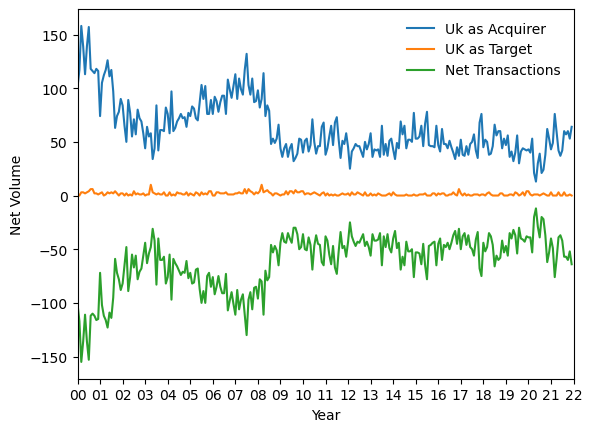

In [8]:
ax = plt.gca()
ax.plot(acquirer_uk.index.values.astype(str), acquirer_uk.vol, label='Uk as Acquirer')
ax.plot(target_uk.index.values.astype(str), target_uk.vol, label='UK as Target')
ax.plot(net_vol_monthly.index.values.astype(str), net_vol_monthly.vol, label='Net Transactions')
ax.set_xticks([])
ax.legend(frameon=False)
ax.set_xticks(ticks=range(0, 265, 12), labels=[str(i).zfill(2) for i in range(0, 23, 1)])
ax.set_xlim(0, 264)
ax.set_ylabel('Net Volume')
ax.set_xlabel('Year');

## GDP

In [9]:
gdp_quarter = read_gdp()
until = '2022-01'
gdp_quarter['Date'] = gdp_quarter['Date'].dt.to_period('M')
gdp_quarter = gdp_quarter[gdp_quarter['Date'] < until]
gdp_quarter

,Date,UK_GDP
0,2000-02,403407.0
1,2000-05,406049.0
2,2000-08,408120.0
3,2000-11,409871.0
4,2001-02,413381.0
...,...,...
83,2020-11,509621.0
84,2021-02,503663.0
85,2021-05,536608.0
86,2021-08,546084.0


In [10]:
res = []
for i in range(int(len(net_vol_monthly)/3)):
    s = net_vol_monthly[3*i: 3*(i+1)]
    res.append(s.vol.sum())
gdp_quarter['vol'] = res
gdp_quarter

,Date,UK_GDP,vol
0,2000-02,403407.0,-373
1,2000-05,406049.0,-383
2,2000-08,408120.0,-375
3,2000-11,409871.0,-343
4,2001-02,413381.0,-286
...,...,...,...
83,2020-11,509621.0,-152
84,2021-02,503663.0,-165
85,2021-05,536608.0,-135
86,2021-08,546084.0,-156


## Variables

In [11]:
until = '2022-01'
var_monthly = read_variable_monthly()
var_monthly['Date'] = var_monthly['Date'].dt.to_period('M')
var_monthly = var_monthly[var_monthly['Date'] < until]

res = {'EXUSUK': [], 'Interest_Rate': [], 'SMI': []}
for i in range(int(len(var_monthly)/3)):
    s = var_monthly[3*i: 3*(i+1)]
    res['EXUSUK'].append(s.EXUSUK.mean())
    res['Interest_Rate'].append(s['Interest_Rate'].mean())
    res['SMI'].append(s.SMI.mean())
gdp_quarter['EXUSUK'] = res['EXUSUK']
gdp_quarter['Interest_Rate'] = res['Interest_Rate']
gdp_quarter['SMI'] = res['SMI']
gdp_quarter

,Date,UK_GDP,vol,EXUSUK,Interest_Rate,SMI
0,2000-02,403407.0,-373,1.606767,5.916667,1241.948000
1,2000-05,406049.0,-383,1.533500,6.000000,1193.004000
2,2000-08,408120.0,-375,1.476700,6.000000,1181.404333
3,2000-11,409871.0,-343,1.446433,6.000000,1121.388000
4,2001-02,413381.0,-286,1.458167,5.833333,1112.460333
...,...,...,...,...,...,...
83,2020-11,509621.0,-152,1.320400,0.100000,911.964667
84,2021-02,503663.0,-165,1.379033,0.100000,1045.408667
85,2021-05,536608.0,-135,1.398467,0.100000,1131.969000
86,2021-08,546084.0,-156,1.377900,0.100000,1151.498333


# Regression

In [12]:
"""To determine the effect the Brexit, we refer to the day of UK announcing its plan to exit the European Union as the separation date"""

x_index = ['EXUSUK', 'Interest_Rate', 'SMI', 'UK_GDP']
y_index = ['vol']

data = gdp_quarter
sep = '2016-6'
data_before = gdp_quarter[gdp_quarter.Date < sep]
data_after = gdp_quarter[gdp_quarter.Date > sep]

"""Regressing on historical transactions between 2000 to June.2016"""
X_train, Y_train = df_to_XY(data_before, xkeys=x_index, ykeys=y_index)
X_train = sm.add_constant(X_train)

"""Regressing on """
X_test, Y_test = df_to_XY(data_after, xkeys=x_index, ykeys=y_index)
X_test = sm.add_constant(X_test)

model_before = LinearRegression().fit(X_train, Y_train)
model_after = LinearRegression().fit(X_test, Y_test)


"""R square of model before the announcement of Brexit"""
model_before.score(X_train, Y_train), model_after.score(X_test, Y_test)

(0.8851251252423746, 0.4834364945013142)

In [13]:
model_before.coef_

array([[ 0.00000000e+00,  1.53951589e+02, -2.52998083e+01,
        -2.00656937e-01,  5.73159151e-04]])

In [14]:
model_before.intercept_

array([-421.25353794])

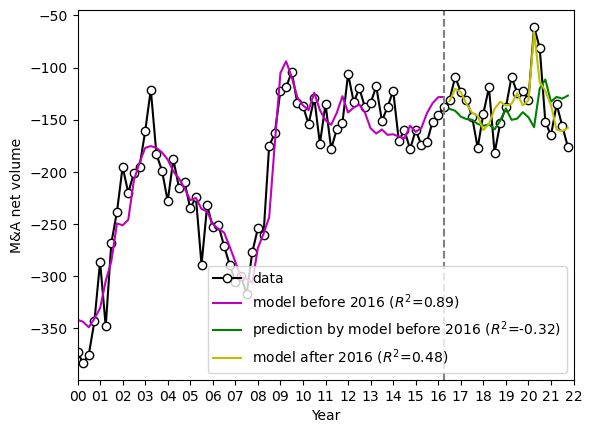

In [15]:
ax = plt.gca()

x_data = data.Date.astype(str)
ax.plot(x_data, data.vol, marker='o', color='k', mfc='white', ls='-', label='data')

Y_train_pred = model_before.predict(X_train)
x_data_before = data_before.index
r = r2_score(Y_train, Y_train_pred,)
ax.plot(x_data_before, Y_train_pred, color='m',
        label=f'model before 2016 ($R^2$={round(r, 2)})')

x_data_after = data_after.index
Y_test_pred = model_before.predict(X_test)
r = r2_score(Y_test, Y_test_pred)
ax.plot(x_data_after, Y_test_pred, color='g',
        label=f'prediction by model before 2016 ($R^2$={round(r, 2)})')

Y_test_pred = model_after.predict(X_test)
r = r2_score(Y_test, Y_test_pred)
ax.plot(x_data_after, Y_test_pred, color='y',
        label=f'model after 2016 ($R^2$={round(r, 2)})')

ax.axvline(65, ls='--', color='gray')
plt.xticks(ticks=range(0, 89, 4), labels=[str(i).zfill(2) for i in range(0, 23, 1)])
ax.set_xlim(0, 88)
ax.set_ylabel('M&A net volume')
ax.set_xlabel('Year')
# ax.set_ylim(0, 500)
ax.legend(loc=0, frameon=True);

In [16]:
multi_model = sm.OLS(Y_train, X_train).fit()

eval_env: 1


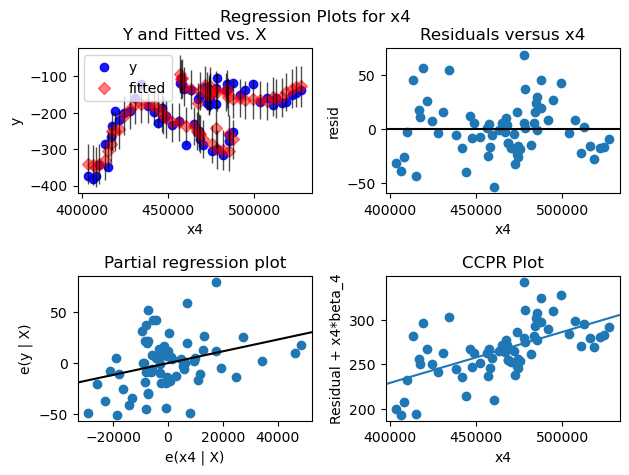

In [17]:
fig = sm.graphics.plot_regress_exog(multi_model, 4)

In [18]:
print(multi_model.summary())
# ['EXUSUK', 'Interest_Rate', 'SMI', 'UK_GDP']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           6.08e-28
Time:                        12:47:46   Log-Likelihood:                -304.92
No. Observations:                  66   AIC:                             619.8
Df Residuals:                      61   BIC:                             630.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -421.2535     80.401     -5.239      0.0

In [19]:
sm.add_constant(X_train)

array([[1.00000000e+00, 1.60676667e+00, 5.91666667e+00, 1.24194800e+03,
        4.03407000e+05],
       [1.00000000e+00, 1.53350000e+00, 6.00000000e+00, 1.19300400e+03,
        4.06049000e+05],
       [1.00000000e+00, 1.47670000e+00, 6.00000000e+00, 1.18140433e+03,
        4.08120000e+05],
       [1.00000000e+00, 1.44643333e+00, 6.00000000e+00, 1.12138800e+03,
        4.09871000e+05],
       [1.00000000e+00, 1.45816667e+00, 5.83333333e+00, 1.11246033e+03,
        4.13381000e+05],
       [1.00000000e+00, 1.42110000e+00, 5.33333333e+00, 1.02155933e+03,
        4.14894000e+05],
       [1.00000000e+00, 1.43860000e+00, 5.00000000e+00, 9.87710667e+02,
        4.16803000e+05],
       [1.00000000e+00, 1.44233333e+00, 4.16666667e+00, 9.16732667e+02,
        4.17480000e+05],
       [1.00000000e+00, 1.42596667e+00, 4.00000000e+00, 9.38210000e+02,
        4.18930000e+05],
       [1.00000000e+00, 1.46213333e+00, 4.00000000e+00, 9.46377667e+02,
        4.21133000e+05],
       [1.00000000e+00, 1.5498

In [20]:
multi_model.model.exog

array([[1.00000000e+00, 1.60676667e+00, 5.91666667e+00, 1.24194800e+03,
        4.03407000e+05],
       [1.00000000e+00, 1.53350000e+00, 6.00000000e+00, 1.19300400e+03,
        4.06049000e+05],
       [1.00000000e+00, 1.47670000e+00, 6.00000000e+00, 1.18140433e+03,
        4.08120000e+05],
       [1.00000000e+00, 1.44643333e+00, 6.00000000e+00, 1.12138800e+03,
        4.09871000e+05],
       [1.00000000e+00, 1.45816667e+00, 5.83333333e+00, 1.11246033e+03,
        4.13381000e+05],
       [1.00000000e+00, 1.42110000e+00, 5.33333333e+00, 1.02155933e+03,
        4.14894000e+05],
       [1.00000000e+00, 1.43860000e+00, 5.00000000e+00, 9.87710667e+02,
        4.16803000e+05],
       [1.00000000e+00, 1.44233333e+00, 4.16666667e+00, 9.16732667e+02,
        4.17480000e+05],
       [1.00000000e+00, 1.42596667e+00, 4.00000000e+00, 9.38210000e+02,
        4.18930000e+05],
       [1.00000000e+00, 1.46213333e+00, 4.00000000e+00, 9.46377667e+02,
        4.21133000e+05],
       [1.00000000e+00, 1.5498

## Homoscedasticity Test

In [21]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(multi_model.resid, multi_model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3.621984421897367),
 ('p-value', 0.45957428291042113),
 ('f-value', 0.8854924595152533),
 ('f p-value', 0.47808004872445076)]

## Multicollinearity Test with Variance Inflation Factor

In [22]:
VIF = [variance_inflation_factor(multi_model.model.exog, i) for i in range(1,5)]
VIF_data = pd.DataFrame(VIF, columns=['VIF'])
VIF_data.index = ['UK_GDP', 'EXUSUK', 'Interest_Rate', 'SMI']
VIF_data

,VIF
UK_GDP,2.308467
EXUSUK,4.435098
Interest_Rate,2.675092
SMI,4.649567


## Forecasting

<AxesSubplot:xlabel='date'>

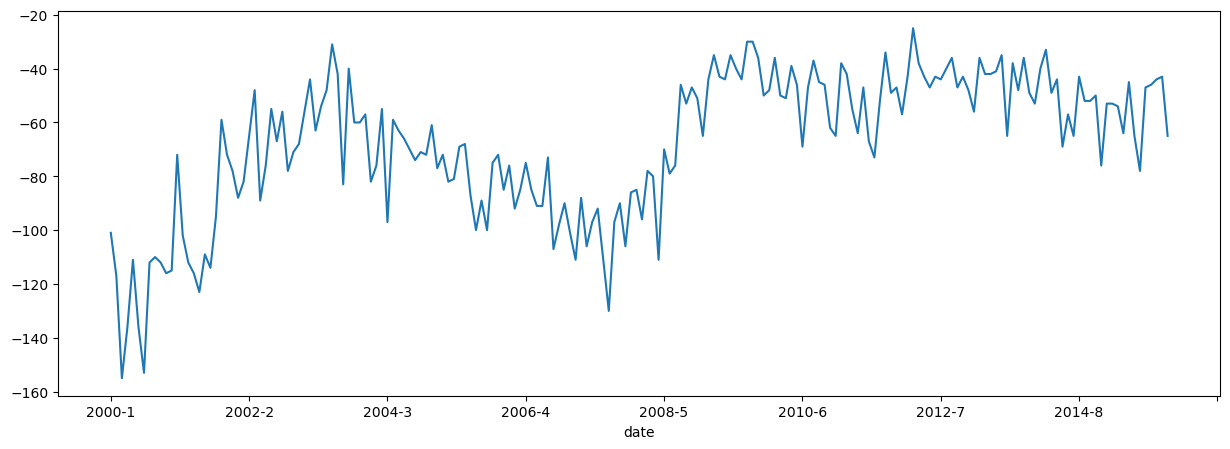

In [23]:
"""Forecasting """
historical_net = net_vol_monthly[net_vol_monthly.index < '2016-06']
endog = historical_net['vol']
endog.plot(figsize=(15,5))

In [24]:
"""Stationary test with Augmented Dickey Fuller Test"""
def stationary_test(timeseries):
    print('Result of ADF test: ')
    dftest = stf(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


stationary_test(endog)
# test statistic > critical value, which implies that the series is not stationary.
# Thus, we need to first transform the time series to make it stationary for VAR forcast

Result of ADF test: 
Test Statistic                  -2.494663
p-value                          0.116778
#Lags Used                       4.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64


Result of ADF test: 
Test Statistic                -8.882609e+00
p-value                        1.305623e-14
#Lags Used                     4.000000e+00
Number of Observations Used    1.860000e+02
Critical Value (1%)           -3.466005e+00
Critical Value (5%)           -2.877208e+00
Critical Value (10%)          -2.575122e+00
dtype: float64


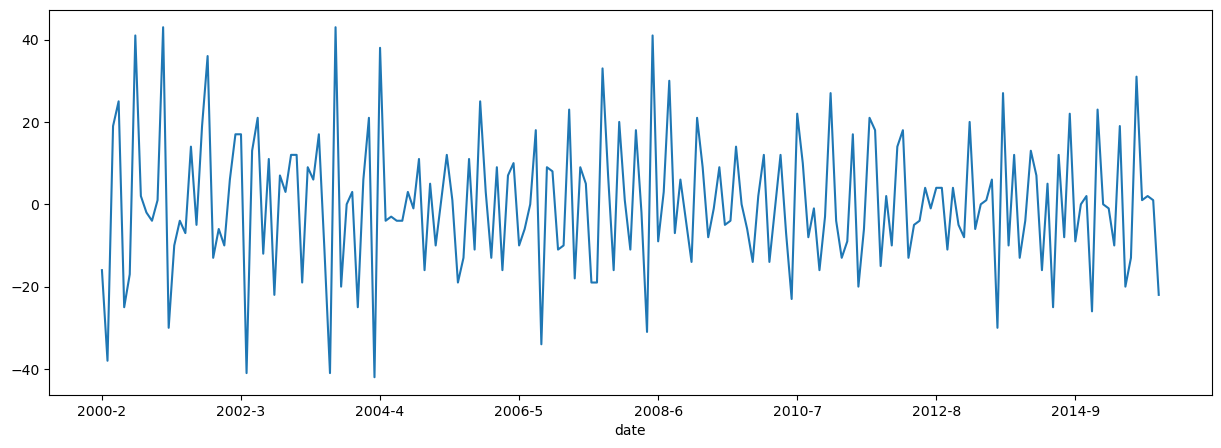

In [25]:
"""Transforming to stationary data for forecasting"""
transformed_endog = endog.diff()
transformed_endog.dropna(axis=0, inplace=True)
transformed_endog.plot(figsize=(15,5))
stationary_test(transformed_endog)

## Forecast with arima

In [38]:
forcast_res1 = sm.tsa.SARIMAX(transformed_endog)
forcast_arima = forcast_res1.fit()
forcast_arima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14750D+00    |proj g|=  8.39133D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   3.774D-05   4.148D+00
  F =   4.1475046007659007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    vol   No. Observations:                  191
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -792.173
Date:                Tue, 22 Nov 2022   AIC                           1588.347
Time:                        17:16:30   BIC                           1594.851
Sample:                    02-01-2000   HQIC                          1590.981
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3561      0.066     -5.434      0.000      -0.484      -0.228
sigma2       234.3139     22.392     10.464      0.000     190.427     278.201
===================================================================================
Ljung-Box (L1) (Q):                   3.81   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.05   Prob(JB):                         0.70
Heteroskedasticity (H):               0.48   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
fosum = forcast_arima.get_forecast('2016-01')
fosum.summary_frame()

vol,mean,mean_se,mean_ci_lower,mean_ci_upper
2016-01-01,7.833183,15.307314,-22.168601,37.834967


<AxesSubplot:xlabel='date'>

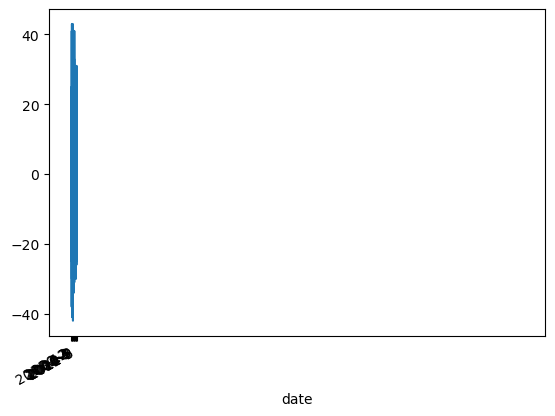

In [66]:
## Plot with the original endog_transformed
fig, ax = plt.subplots()
transformed_endog.plot(ax=ax)

## Plot the forecast boundaries
fcast = fosum.summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
# ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

## Forecast with vector autoregression

In [30]:
diff_gdp= gdp_quarter[['UK_GDP','vol', 'EXUSUK', 'Interest_Rate', 'SMI']]
diff_gdp.index.name = 'Date'
diff_gdp.index = gdp_quarter['Date']
diff_gdp.diff().dropna()
forecast_gdp = VAR(diff_gdp)
forecast_res = forecast_gdp.fit(maxlags=15, method='ols')
forecast_res.summary()

/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/vector_ar/var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Nov, 2022
Time:                     12:48:31
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -147.173
Nobs:                     73.0000    HQIC:                  -154.344
Log likelihood:           5669.08    FPE:               -7.31929e-66
AIC:                     -159.096    Det(Omega_mle):    -2.06610e-67
--------------------------------------------------------------------
Results for equation UK_GDP
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                -26234.267829      1283.135677          -20.445           0.000
L1.UK_GDP                 0.805099              NAN              NAN             NAN
L1.vol                   84.678957         